In [10]:
import os
import re
import warnings
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em

In [4]:
warnings.simplefilter('ignore')

In [6]:
FILE_PATH = 'datasets/testdatatemp.hdf'

In [7]:
with rio.open(FILE_PATH) as dataset:
    print(dataset)
    hdf4_meta = dataset.meta

<open DatasetReader name='datasets/testdatatemp.hdf' mode='r'>


In [8]:
hdf4_meta

{'driver': 'HDF4',
 'dtype': 'float_',
 'nodata': None,
 'width': 512,
 'height': 512,
 'count': 0,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [9]:
with rio.open(FILE_PATH) as dataset:
    crs = dataset.read_crs()
    for name in dataset.subdatasets:
        print(name)

HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:LST_Day_1km
HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:Emis_32
HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:Clear_day_cov
HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:Clear_night_cov
HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:QC_Day
HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:Day_view_time
HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:Day_view_angl
HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:LST_Night_1km
HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:QC_Night
HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:Night_view_time
HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:Night_view_angl
HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:Emis_31


In [14]:
temps = None

with rio.open(FILE_PATH) as dataset:
    with rio.open('HDF4_EOS:EOS_GRID:datasets/testdatatemp.hdf:MODIS_Grid_Daily_1km_LST:LST_Day_1km') as subdataset:
        modis_meta = subdataset.profile
        temps = subdataset.read(1)

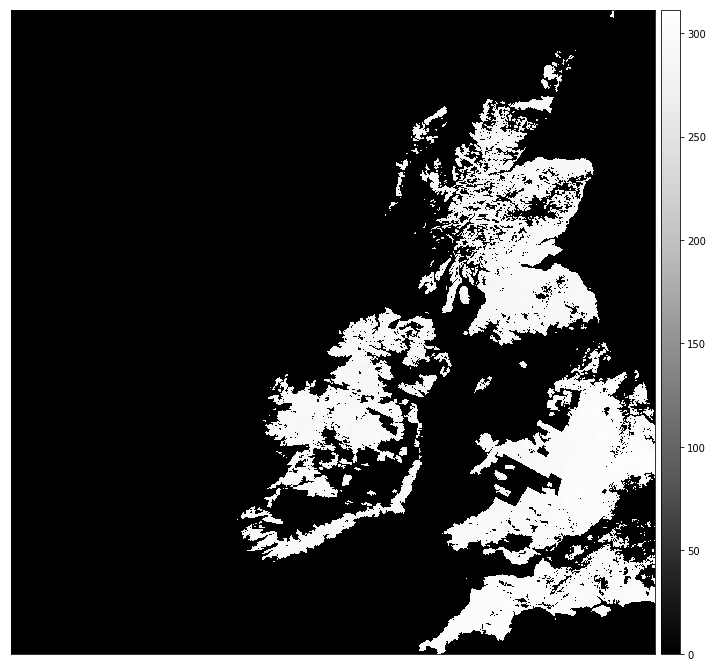

In [23]:
ep.plot_bands(temps*0.02, scale=False)

In [24]:
modis_meta

{'driver': 'HDF4Image', 'dtype': 'uint16', 'nodata': 0.0, 'width': 1200, 'height': 1200, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not_specified_based_on_custom_spheroid",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(926.6254331391667, 0.0, -1111950.519767,
       0.0, -926.6254331383334, 6671703.118599), 'tiled': False}

In [30]:
modis_meta['crs'].to_dict()

{'proj': 'sinu',
 'lon_0': 0,
 'x_0': 0,
 'y_0': 0,
 'R': 6371007.181,
 'units': 'm',
 'no_defs': True}